In [1]:
# make relevant imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# import supporting libraries
import backcaster as bc
import backcastingvis as vs

# Plotting style
mpl.rc('text', usetex = True)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.style.use('fivethirtyeight')

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [5]:
# import dataset
raw_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date']).sort_index()

# specify datasets
country_list = ['Italy', 'France', 'United Kingdom', 'Sweden']  # countries
time_window_list = [10, 8, 6, 7]  # time windows for each country (pre-computed using FNN)
time_window_hosp_list = [10, 8, 6, 7]
t_star_list = [160, 167, 160, 189]  # T* corresponding to the same date in each country

C:\Users\Androcles\Desktop\COVID Group\Back-Casting\Code\Curated Code\backcaster.py:42: RuntimeWarning: invalid value encountered in true_divide
  x = (x - x.mean())/x.std()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

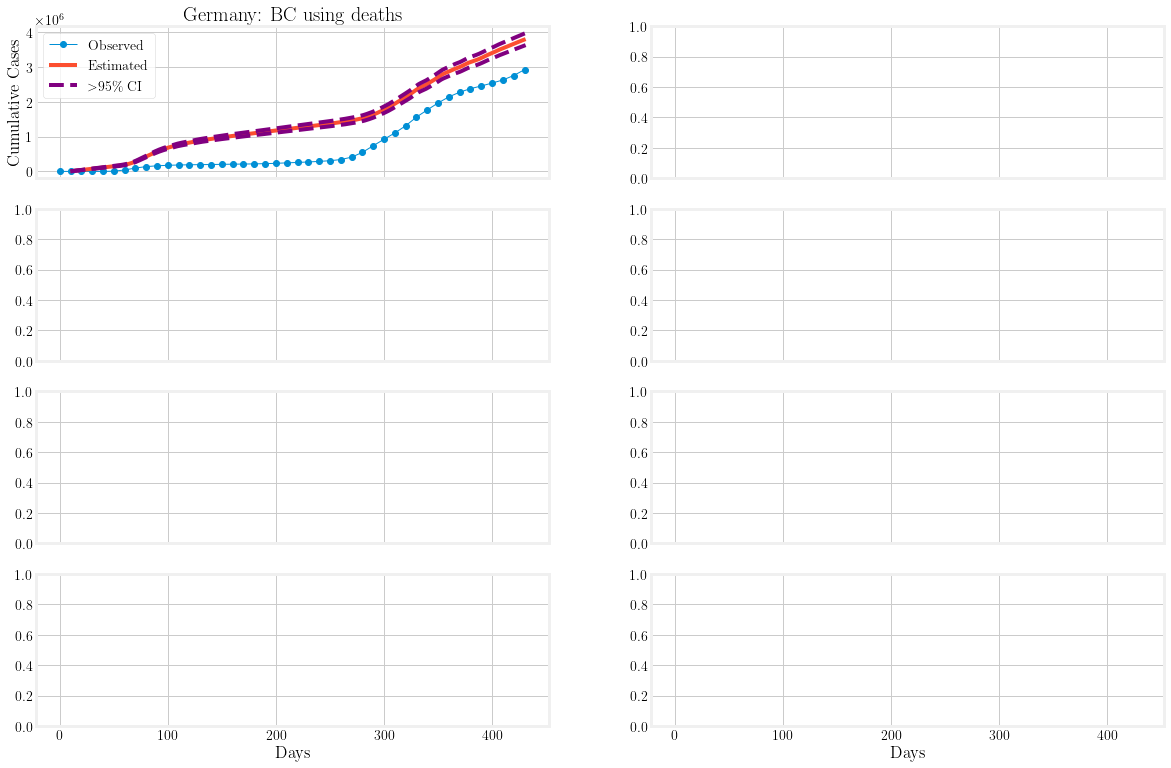

In [10]:
# For each country, backcast using deaths and hospitalizations as predictors

# plotting
fig, ax = plt.subplots(4, 2, figsize=(18, 12), sharey=False, sharex=True);
fig.patch.set_facecolor('white')

ax[3, 0].set_xlabel('Days')
ax[3, 1].set_xlabel('Days')

for i, country in enumerate(country_list):
    time_window = time_window_list[i]
    time_window_hosp = time_window_hosp_list[i]
    t_star_here = t_star_list[i]
#     print(country)
    data = raw_data[raw_data['location']==country]
    data.set_index('date', inplace=True)
    
    # unzip
    deaths = data['new_deaths_smoothed'].fillna(0).to_numpy()
    cases = data['new_cases_smoothed'].fillna(0).to_numpy()
    hosp = data['hosp_patients'].fillna(0).to_numpy()
    
    CRC_cases, CRC_errors, CRC_cum_error = bc.generate_CRC(cases, deaths)
    
    # backcast using deaths
    loc_pred = bc.BackCaster(deaths[1:], CRC_cases, t_star=t_star_here, window=time_window, norm=True)
    loc_pred_up = bc.BackCaster(deaths[1:], CRC_cases + 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window)
    loc_pred_down = bc.BackCaster(deaths[1:], CRC_cases - 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window)
    loc_pred.fit_gp()
    loc_pred_up.fit_gp()
    loc_pred_down.fit_gp()
    win = loc_pred.window
    offset = win+len(loc_pred.pred)
    ax[i, 0].plot(np.arange(offset)[::10], CRC_cases.cumsum()[::10],'o-', linewidth=1, label='Observed')
    ax[i, 0].plot(np.arange(win, offset),loc_pred.pred.cumsum(), label='Estimated')
    ax[i, 0].plot(np.arange(win, offset), loc_pred_up.pred.cumsum(),'--',c='purple',label=r'$>$95\% CI')
    ax[i, 0].plot(np.arange(win, offset), loc_pred_down.pred.cumsum(),'--',c='purple')
    ax[i, 0].set_title('{}: BC using deaths'.format(country))
    ax[i, 0].set_ylabel('Cumulative Cases')
    ax[i, 0].legend()
#     print(country, 'Deaths')
#     print('mean', loc_pred.pred.cumsum()[t_star_here-time_window])
#     print('upper', loc_pred_up.pred.cumsum()[t_star_here-time_window])
#     print('lower',loc_pred_down.pred.cumsum()[t_star_here-time_window])
    
    # backcast using hospitalizations
    loc_pred = bc.BackCaster(hosp[1:], CRC_cases, t_star=t_star_here, window=time_window_hosp, norm=True)
    loc_pred_up = bc.BackCaster(hosp[1:], CRC_cases + 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window_hosp)
    loc_pred_down = bc.BackCaster(hosp[1:], CRC_cases - 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window_hosp)
    loc_pred.fit_gp()
    loc_pred_up.fit_gp()
    loc_pred_down.fit_gp()
    win = loc_pred.window
    offset = win+len(loc_pred.pred)
    ax[i, 1].plot(np.arange(offset)[::10], CRC_cases.cumsum()[::10],'o-', linewidth=1, label='Observed')
    ax[i, 1].plot(np.arange(win, offset),loc_pred.pred.cumsum(), label='Estimated')
    ax[i, 1].plot(np.arange(win, offset), loc_pred_up.pred.cumsum(),'--',c='purple', label=r'$>$95\% CI')
    ax[i, 1].plot(np.arange(win, offset), loc_pred_down.pred.cumsum(),'--',c='purple')
    ax[i, 1].set_title('{}: BC using hospitalizations'.format(country))
    ax[i, 1].legend()
#     print(country, 'Hosp')
#     print('mean', loc_pred.pred.cumsum()[t_star_here-time_window])
#     print('upper', loc_pred_up.pred.cumsum()[t_star_here-time_window])
#     print('lower',loc_pred_down.pred.cumsum()[t_star_here-time_window])
plt.show()

In [7]:
#fig.savefig('Numerical_Results_Plots', bbox_inches='tight',pad_inches=0.1);

In [8]:
# For each country, backcast using only deaths (hospitalizations not available)

country_list = ['Germany', 'Spain', 'South Korea']  # countries
time_windows = [9, 5, 12]  # time windows for each country (pre-computed using FNN)
t_star_list = [164, 189, 170]  # T* corresponding to the same date in each country

In [ ]:
# plotting
fig, ax = plt.subplots(1, 3, figsize=(19, 3), sharey=False, sharex=True);
fig.patch.set_facecolor('white')

for axis in ax:
    axis.set_xlabel('Days')

for i, country in enumerate(country_list):
    time_window = time_windows[i]
    t_star_here = t_star_list[i]
#     print(country)
    data = raw_data[raw_data['location']==country]
    data.set_index('date', inplace=True)
    
    # unzip
    deaths = data['new_deaths_smoothed'].fillna(0).to_numpy()
    cases = data['new_cases_smoothed'].fillna(0).to_numpy()
    hosp = data['hosp_patients'].fillna(0).to_numpy()
    
    CRC_cases, CRC_errors, CRC_cum_error = bc.generate_CRC(cases, deaths)
    
    # backcast using deaths
    loc_pred = bc.BackCaster(deaths[1:], CRC_cases, t_star=t_star_here, window=time_window, norm=True)
    loc_pred_up = bc.BackCaster(deaths[1:], CRC_cases + 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window)
    loc_pred_down = bc.BackCaster(deaths[1:], CRC_cases - 1.96*np.sqrt(CRC_errors), t_star=t_star_here, window=time_window)
    loc_pred.fit_gp()
    loc_pred_up.fit_gp()
    loc_pred_down.fit_gp()
    win = loc_pred.window
    offset = win+len(loc_pred.pred)
    ax[i].plot(np.arange(offset)[::10], CRC_cases.cumsum()[::10],'o-', linewidth=1, label='Observed')
    ax[i].plot(np.arange(win, offset),loc_pred.pred.cumsum(), label='Estimated')
    ax[i].plot(np.arange(win, offset), loc_pred_up.pred.cumsum(),'--',c='purple',label=r'$>$95\% CI')
    ax[i].plot(np.arange(win, offset), loc_pred_down.pred.cumsum(),'--',c='purple')
    ax[i].set_title('{}'.format(country))
    ax[i].set_ylabel('Cumulative Cases')
    ax[i].legend()
#     print(loc_pred.pred.cumsum()[t_star_here-time_window])
#     print(loc_pred_up.pred.cumsum()[t_star_here-time_window])
#     print(loc_pred_down.pred.cumsum()[t_star_here-time_window])
plt.show()

In [11]:
#fig.savefig('Numerical_Results_Plots_2', bbox_inches='tight',pad_inches=0.1);